In [1]:
import sys
sys.path.append('../src')

from module.linear import Linear
from module.tanH import TanH
from module.sigmoide import Sigmoide
from loss.mse_loss import MSELoss
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net, plot_2d

import numpy as np
import matplotlib.pyplot as plt

## Non linéaire : XOR 

In [2]:
X, y = generate_data_gauss(300, [[1, 1], [7, 7], [1, 7], [7, 1]], [[1, 1], [1, 1], [1, 1], [1, 1]], labels=[-1, -1, 1, 1])

Training completed.


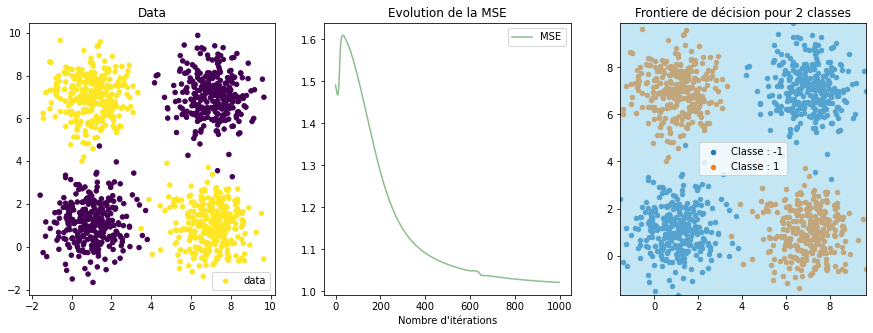

In [3]:
net = Sequentiel([
    Linear(2, 2, bias=True),
    TanH(),
    Linear(2, 1, bias=True),
    Sigmoide(),
])

optim = Optim(net, MSELoss(), eps=1e-5)
optim.SGD(X, y, batch_size=60, num_iterations=1000, verbose=False)

plot_net(X, y, net, optim.train_loss)

In [4]:
sigma = [0.2, 0.2]
X, y = generate_data_gauss(300, [[-1, -1], [1, 1], [-1, 1], [1, -1]], [sigma, sigma, sigma, sigma], labels=[-1, -1, 1, 1])

Training completed.


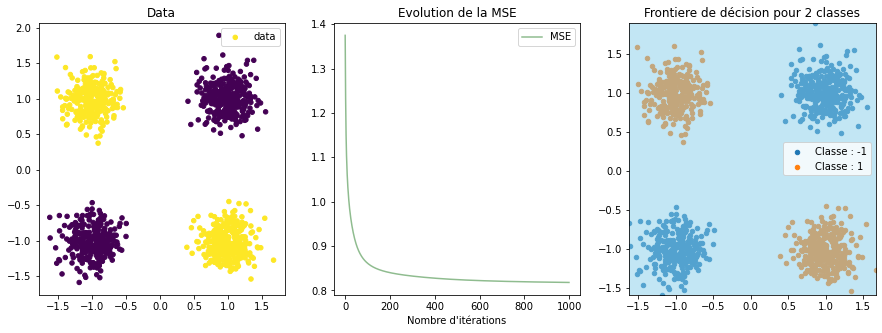

In [5]:
net = Sequentiel([
    Linear(2, 3),
    Sigmoide(),
    Linear(3, 1),
    Sigmoide(),  
])

optim = Optim(net, MSELoss(), eps=1e-3)
optim.SGD(X, y, batch_size=len(X), num_iterations=1000, verbose=False)

plot_net(X, y, net, optim.train_loss)

In [6]:
X, y = generate_data_gauss(300, [[1, 1], [7, 7]], [[1, 1], [1, 1]], labels=[-1, 1])

In [9]:
y = y.reshape((-1, 1))

Training completed.


/home/amayas/anaconda3/lib/python3.9/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/amayas/anaconda3/lib/python3.9/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


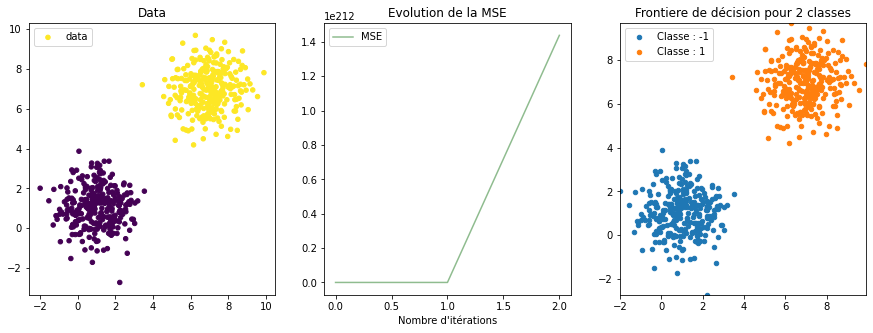

In [13]:
net = Sequentiel([
    Linear(2, 1),
    # Sigmoide(),
    Linear(1, 1),
    # Sigmoide(), 
])

optim = Optim(net, MSELoss(), eps=1e-3)
optim.SGD(X, y, batch_size=len(X), num_iterations=1000, verbose=False)

plot_net(X, y, net, optim.train_loss)